In [2]:
import pandas as pd

url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)

print(df.head())
df.to_csv("iris.csv", index=False)
print("Archivo 'iris.csv' descargado.")


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Archivo 'iris.csv' descargado.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Cargar dataset
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)

# Mostrar primeras filas
print(df.head())

# Selección de características (solo dos para poder graficar 2D fácilmente)
X = df[["sepal_length", "sepal_width"]].values

y = df["species"].values

le = LabelEncoder()
y_encoded = le.fit_transform(y)



   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


creamos y entrenamos el modelo

In [4]:
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=200)
model.fit(X, y_encoded)


c:\Users\IPF-2025\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'multinomial'


In [5]:
accuracy = model.score(X, y_encoded)
print(f"Precisión del modelo en los datos de entrenamiento: {accuracy:.2f}")


Precisión del modelo en los datos de entrenamiento: 0.82


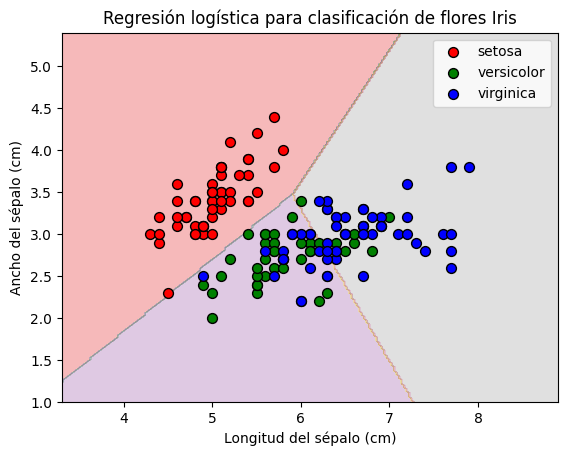

In [ ]:



x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predecir la clase para cada punto de la malla
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar las regiones de decisión
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)

# Graficar los puntos reales
for i, color, label in zip(range(3), ['red', 'green', 'blue'], le.classes_):
    plt.scatter(X[y_encoded == i, 0], X[y_encoded == i, 1],
                c=color, label=label, edgecolor='k', s=50)

plt.xlabel("Longitud del sépalo (cm)")
plt.ylabel("Ancho del sépalo (cm)")
plt.title("Regresión logística para clasificación de flores Iris")
plt.legend()
plt.show()
